In [41]:
%matplotlib inline

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
seed = 12345
np.random.seed(seed)

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [44]:
train_data.shape

(404, 13)

In [45]:
test_data.shape

(102, 13)

In [46]:
train_targets.shape

(404,)

In [47]:
test_targets.shape

(102,)

In [75]:
def baseline_model(n_features=13, n=15, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(n, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [76]:
model = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5,verbose=0)

In [80]:
pipeline = Pipeline([
    ('standard', StandardScaler()),
    ('model', model)
])
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, train_data, train_targets, cv=kfold)

In [81]:
# Cross val score returns -ive mses
results = pd.Series(results).abs()

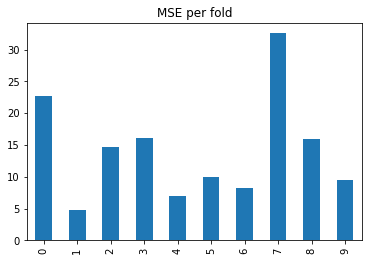

In [82]:
results.plot(kind='bar', title='MSE per fold')